<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:brown;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Red Wine Quality Prediction
</p>
</div>

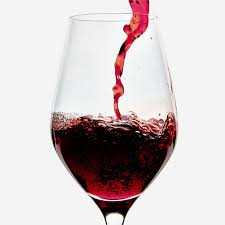

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Importing Libraries
</p>
</div>

In [61]:
import pandas as pd
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.preprocessing  import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
warnings.filterwarnings("ignore")

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Brown; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Loading Dataset</p>

In [62]:
df = pd.read_csv("C:/Users/user/OneDrive/Desktop/winequality-red.csv")

In [63]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Brown; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Basic Understanding of Data

In [64]:
df.shape

(1599, 12)

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">



<b>Basic Insights From Descriptive Stats</b><br>

💡The average value of fixed acidity is 8.31, the highest value is 15.9 and you can look for similar values from the table itself.
Mean values for all the independent variables(all columns except quality) is larger than 50th percentile. (Can you tell me in the comments what does it mean?)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [67]:
df.select_dtypes(include="float").head().T

,0,1,2,3,4
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000
citric acid,0.0000,0.0000,0.040,0.560,0.0000
residual sugar,1.9000,2.6000,2.300,1.900,1.9000
chlorides,0.0760,0.0980,0.092,0.075,0.0760
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100
sulphates,0.5600,0.6800,0.650,0.580,0.5600


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Data Cleaning
</p>
</div>

In [68]:
df1 = (df.isnull().sum()[df.isnull().sum()>0]).to_frame().rename(columns={0:"Number of Missing values"})
df1["% of Missing Values"] = round((100*df.isnull().sum()[df.isnull().sum()>0]/len(df)),2)
df1

,Number of Missing values,% of Missing Values


In [69]:
print(f"% of duplicates value:({df.duplicated().sum()})({100*df.duplicated().sum()/len(df)})%")


% of duplicates value:(240)(15.0093808630394)%


In [70]:
df.drop_duplicates(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],inplace=True)

In [71]:
print(f"% of duplicates value:({df.duplicated().sum()})({100*df.duplicated().sum()/len(df)})%")


% of duplicates value:(0)(0.0)%


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Exploratory Data Analysis (EDA)
</p>
</div>

In [72]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [73]:
df["quality"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

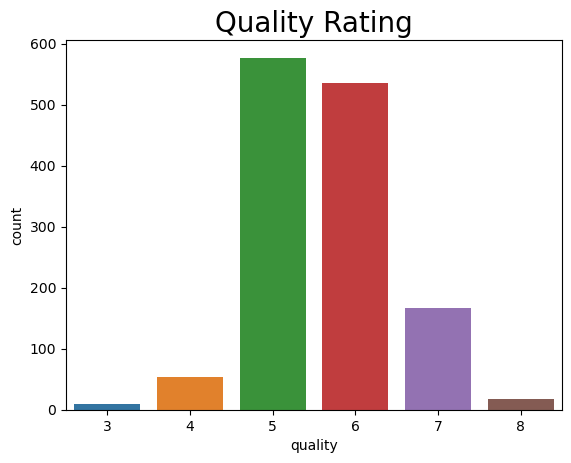

In [75]:
sns.countplot(df['quality'],data=df)
plt.title("Quality Rating" ,fontsize=20);

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">



<b>Description</b><br>

💡 Brief information
It turns out that the dataset does not have null values. The dataset consists of 1599 rows and 12 columns. The data type of all variables are float or int.Quality points range from 3 to 8. Amongst the given quality ratings, majority testers(~82.4%) had given 5 or 6.!.<br>.
 
<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color:aliceblue;"><b>
</div> 

In [76]:
df['quality'] =df['quality'].apply(lambda x : 1 if x>=6  else 0)

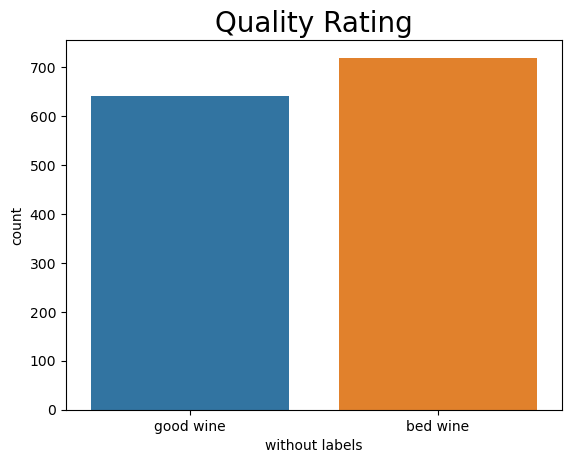

In [77]:
sns.countplot(df['quality'],data=df)
plt.title("Quality Rating" ,fontsize=20)
plt.xticks([0,1],["good wine","bed wine"]);
plt.xlabel("without labels");

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">



<b>Observation</b><br>

💡  As we can see that the data is not properly balanced. To solve this Random Over Sampler is used to balance the data
    .!
💡  Most of the wines are of average quality and fewer are bad or good.
Now that I have ample information on the wine qualities, I need to check which other properties of the wines are correlelated or related to the wine quality.


In [78]:
corr = df.corr()
corr['quality']

fixed acidity           0.091761
volatile acidity       -0.327195
citric acid             0.167903
residual sugar         -0.002371
chlorides              -0.115071
free sulfur dioxide    -0.069207
total sulfur dioxide   -0.235046
density                -0.168958
pH                      0.004693
sulphates               0.211365
alcohol                 0.446176
quality                 1.000000
Name: quality, dtype: float64

In [79]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab


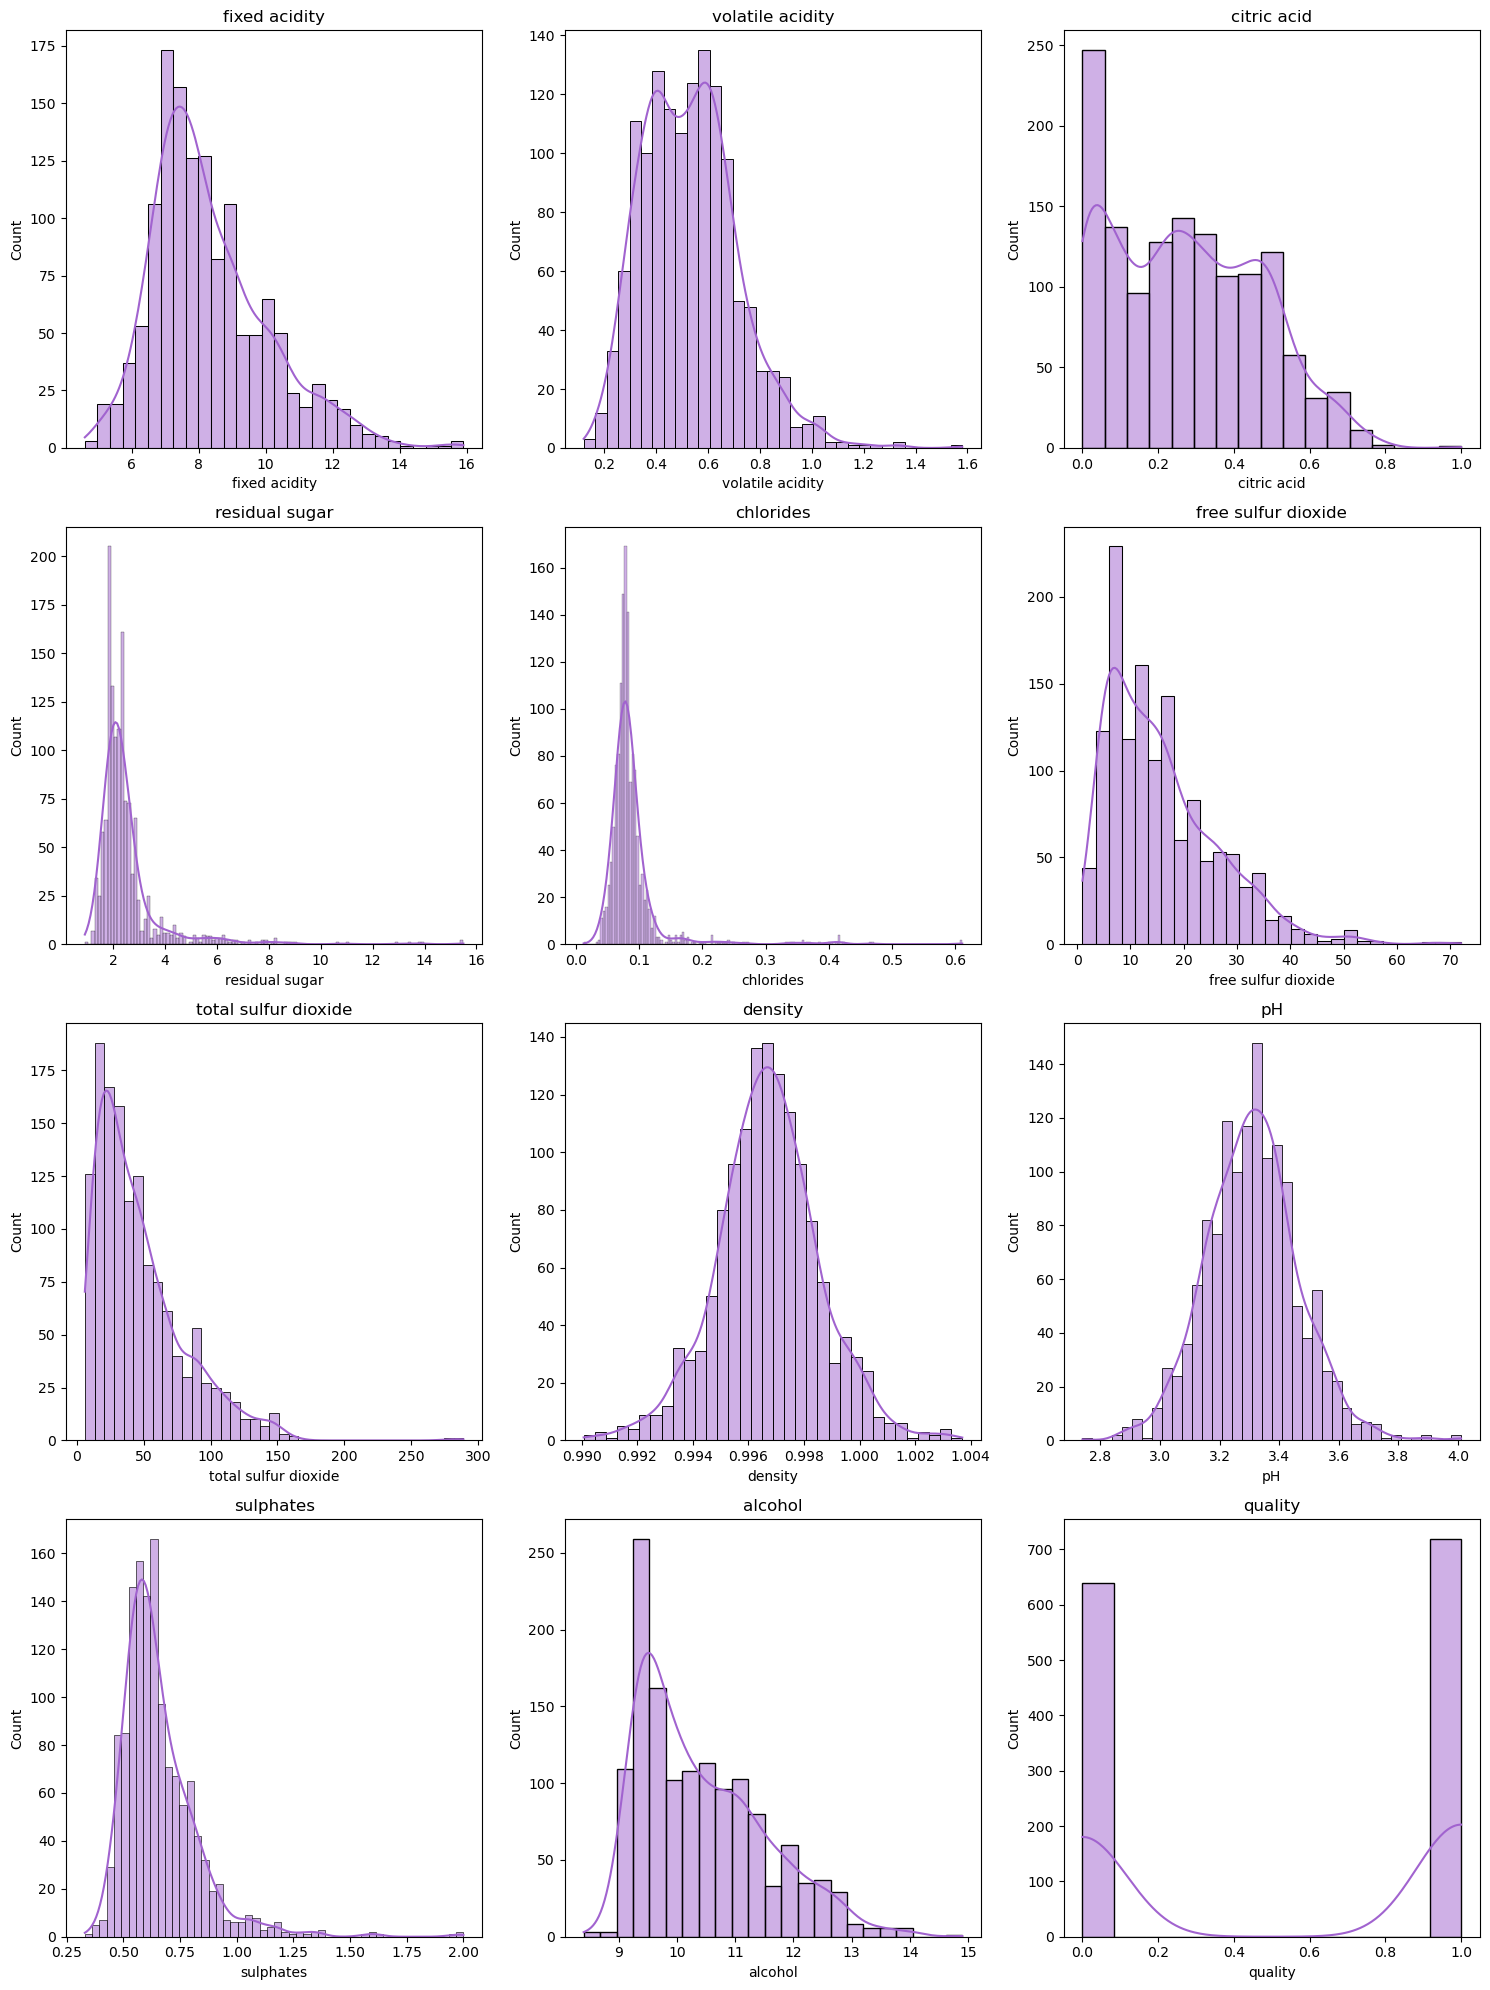

In [80]:
numerical_cols = df.select_dtypes(include='number').columns.tolist()

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

for col, ax in zip(numerical_cols, axs.flat): #iterating over numerical columns, and its respective subplot in flattened axes using zip()
    #col contains number of current numerical column and ax contains the current subplot
    sns.histplot(data=df, x=col, kde=True, ax=ax, color="#A163CF")
    ax.set(title=col)
    if ax.get_subplotspec().is_last_row():
        ax.set(xlabel=col)

plt.tight_layout() #adjust the spacing between the subplots to eliminate overlapping
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">



<b>OBasic Insights From above histplots based on observations!</b><br>

💡 fixed acidity looks normal but although its a bit right skewed, similarly with some
other features like sulphates, chlorides.
    
    
💡Density and pH  ,chlorides and Density looks normally distributed

💡Some features are not normal as well like alcohol, citric acid.  


## correlation between features

In [81]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.091761
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.327195
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.167903
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,-0.002371
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.115071
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.069207
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.235046
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.168958
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,0.004693
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.211365


##  Different types of Visualizations 

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

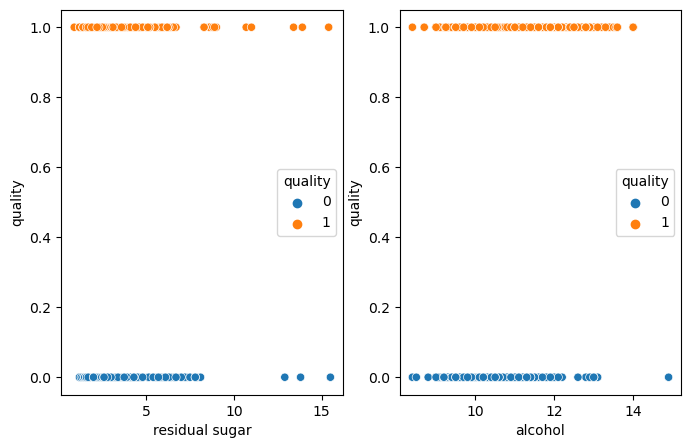

In [82]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.scatterplot(df['residual sugar'],df['quality'],hue='quality',data=df)
plt.subplot(1,2,2)
sns.scatterplot(df['alcohol'],df['quality'],hue='quality',data=df)

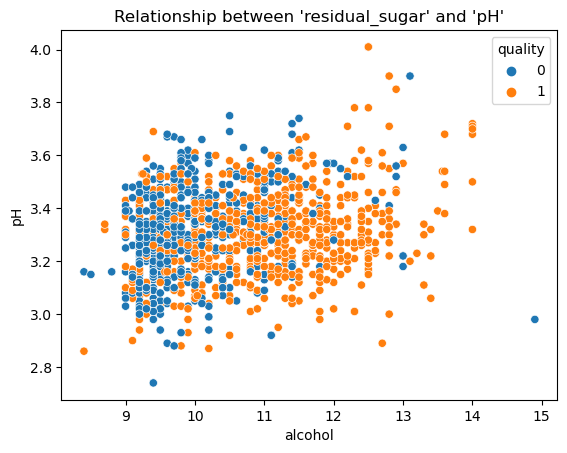

In [83]:
sns.scatterplot(x="alcohol",y="pH",
                hue = "quality",
                data = df).set(title = "Relationship between 'residual_sugar' and 'pH'");

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">



<b>Observation  corralation between alcohal and pH!</b><br>

💡 you can easily see. there is  weak positive correaltion or no correlation between alcohal and pH
    


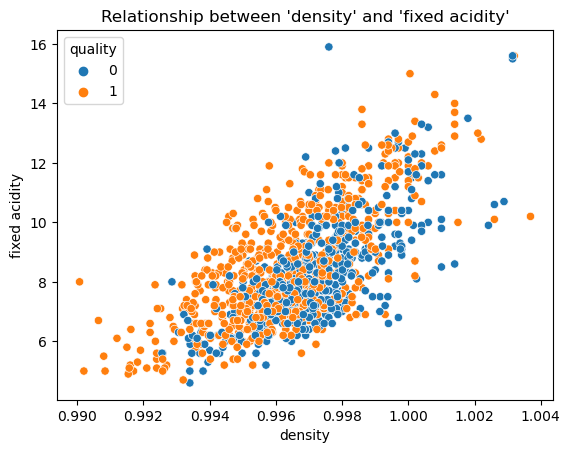

In [84]:
sns.scatterplot(df["density"],df["fixed acidity"],
                hue = "quality",
                data = df).set(title = "Relationship between 'density' and 'fixed acidity'");

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">



<b>Observation  corralation between density and fixed_acidity!</b><br>

💡 As we can observe that there is high positive correlation between density and fixed_acidity
    


<div style="font-family:Georgia;background-color:aliceblue; padding:40px; font-size:25px">



<b>Data Preprocessing</b><br>

In [85]:
df['quality'] = np.where(df['quality']>5,1,0)
x = df.drop(columns=['quality'],axis=1)
y = df['quality']

<div style="font-family:Georgia;background-color:aliceblue; padding:40px; font-size:15px">



<b>Standardization!
It basically refers to scaling, as ML is totally based on data, so if we think about it clearly that data of two different scales may end up affecting our model differently.Suppose one of your feature is of the order of 10^3 and other feature is of the order of 10^1 then the higher order feature may end up affecting our model much more than the lower order one.

To tackle this problem we have many different types of Scaling techniques, one that we are using here is called MinMax scaler, We are using this here because, It is best when your data is not normally distributed.</b><br>

In [86]:
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scale_x =scaler.fit_transform(x)

In [87]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [88]:
x_train,x_test,y_train,y_test=train_test_split(scale_x,y,test_size=0.3,random_state=43)

In [89]:
print("x_train shape",scale_x.shape)
print("y shape",y.shape)

x_train shape (1359, 11)
y shape (1359,)


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Model Building
</p>
</div>

In [90]:
training_score=[]
testing_score=[]
def classification_model(model):
    model.fit(x_train,y_train)
    x_train_pred=model.predict(x_train)
    x_test_pred=model.predict(x_test)
    a = accuracy_score(y_train,x_train_pred)
    b = accuracy_score(y_test,x_test_pred)
    training_score.append(a)
    testing_score.append(b)
    print(f"accuracy score of {model} model on training is :",a)
    print(f"accuracy score of {model} model on testing  is :",b)

In [91]:
classification_model(DecisionTreeClassifier())

accuracy score of DecisionTreeClassifier() model on training is : 1.0
accuracy score of DecisionTreeClassifier() model on testing  is : 1.0


In [92]:
classification_model(RandomForestClassifier())

accuracy score of RandomForestClassifier() model on training is : 1.0
accuracy score of RandomForestClassifier() model on testing  is : 1.0


<div style="font-family:Georgia;background-color:aliceblue; padding:40px; font-size:15px">



<b>I got 100 % accuracy on RedWine Data Set. so i dont need to apply futher models.</b><br>